# 3
## 3.4

In [1]:
# List 3-1
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
# List 3-2

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## 3.4.3

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
# List 3-3

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# List 3-4, 3-5, 3-6

from tensorflow.keras import optimizers
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 3.4.4

In [10]:
# List 3-7

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
# List 3-8

history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 117us/sample - loss: 0.5209 - acc: 0.7889 - val_loss: 0.4024 - val_acc: 0.8607
Epoch 2/20
15000/15000 [==============================] - 1s 65us/sample - loss: 0.3162 - acc: 0.9017 - val_loss: 0.3089 - val_acc: 0.8873
Epoch 3/20
15000/15000 [==============================] - 1s 65us/sample - loss: 0.2308 - acc: 0.9232 - val_loss: 0.2803 - val_acc: 0.8907
Epoch 4/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.1815 - acc: 0.9419 - val_loss: 0.2781 - val_acc: 0.8890
Epoch 5/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.1440 - acc: 0.9544 - val_loss: 0.2815 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.1175 - acc: 0.9641 - val_loss: 0.2945 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.0977 - acc: 0.9704 - val_loss: 0

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

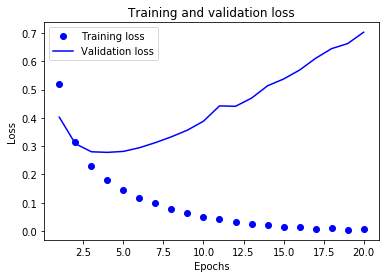

In [13]:
# List 3-9

%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

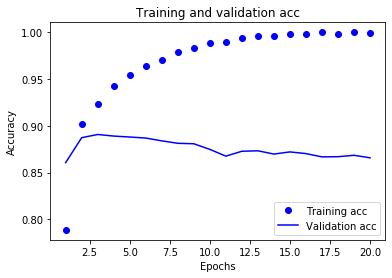

In [14]:
# List 3-10

plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# List 3-11

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 43us/sample - loss: 0.4651 - acc: 0.8258
Epoch 2/4
25000/25000 [==============================] - 1s 42us/sample - loss: 0.2681 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 1s 41us/sample - loss: 0.2051 - acc: 0.9278
Epoch 4/4
25000/25000 [==============================] - 2s 76us/sample - loss: 0.2871 - acc: 0.8869


In [17]:
results

[0.2871428288269043, 0.88688]

## 3.4.5

In [18]:
model.predict(x_test)

array([[0.2208839 ],
       [0.99986637],
       [0.94934404],
       ...,
       [0.12929255],
       [0.09281069],
       [0.61716866]], dtype=float32)

## 3.4.6
### 隠れ層が1つ

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 42us/sample - loss: 0.4374 - acc: 0.8280
Epoch 2/4
25000/25000 [==============================] - 1s 40us/sample - loss: 0.2672 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.2130 - acc: 0.9260
Epoch 4/4
25000/25000 [==============================] - 2s 67us/sample - loss: 0.2818 - acc: 0.8878


[0.2817981803894043, 0.88784]

In [20]:
model.predict(x_test)

array([[0.27630293],
       [0.9998523 ],
       [0.92632115],
       ...,
       [0.12881687],
       [0.10864413],
       [0.5186652 ]], dtype=float32)

### 隠れ層が3つ

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 43us/sample - loss: 0.4439 - acc: 0.8198
Epoch 2/4
25000/25000 [==============================] - 1s 41us/sample - loss: 0.2425 - acc: 0.9123
Epoch 3/4
25000/25000 [==============================] - 1s 41us/sample - loss: 0.1891 - acc: 0.9320
Epoch 4/4
25000/25000 [==============================] - 2s 69us/sample - loss: 0.3227 - acc: 0.8768


[0.32265740580558777, 0.87684]

In [22]:
model.predict(x_test)

array([[0.18921402],
       [0.9998557 ],
       [0.9768312 ],
       ...,
       [0.1393641 ],
       [0.04699621],
       [0.8214326 ]], dtype=float32)

### 隠れユニット数が 32

In [23]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 40us/sample - loss: 0.4221 - acc: 0.8260
Epoch 2/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.2366 - acc: 0.9134
Epoch 3/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.1900 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 68us/sample - loss: 0.3147 - acc: 0.8778


[0.31468998133659365, 0.87776]

In [24]:
model.predict(x_test)

array([[0.15733054],
       [0.9997734 ],
       [0.96829605],
       ...,
       [0.15950316],
       [0.06480092],
       [0.8126569 ]], dtype=float32)

### 隠れユニット数が 64

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 45us/sample - loss: 0.4126 - acc: 0.8183
Epoch 2/4
25000/25000 [==============================] - 1s 46us/sample - loss: 0.2345 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 1s 46us/sample - loss: 0.1857 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 68us/sample - loss: 0.3165 - acc: 0.8791


[0.31650982095718383, 0.87912]

In [26]:
model.predict(x_test)

array([[0.181023  ],
       [0.99991536],
       [0.9400916 ],
       ...,
       [0.10529652],
       [0.03734061],
       [0.7234469 ]], dtype=float32)

### 損失関数を binary_crossentropy から mse に変更する

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 40us/sample - loss: 0.1505 - acc: 0.8196
Epoch 2/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.0791 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.0586 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.0908 - acc: 0.8767


[0.09081152625143528, 0.87672]

In [28]:
model.predict(x_test)

array([[0.21653235],
       [0.99671984],
       [0.9580384 ],
       ...,
       [0.25213432],
       [0.14913431],
       [0.7875196 ]], dtype=float32)

### 活性化関数を reru から tanh に変更する

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 1s 40us/sample - loss: 0.4135 - acc: 0.8356
Epoch 2/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.2310 - acc: 0.9150
Epoch 3/4
25000/25000 [==============================] - 1s 42us/sample - loss: 0.1767 - acc: 0.9344
Epoch 4/4
25000/25000 [==============================] - 2s 71us/sample - loss: 0.3278 - acc: 0.8751


[0.32783140035152436, 0.87512]

In [30]:
model.predict(x_test)

array([[0.08240131],
       [0.9983857 ],
       [0.84478474],
       ...,
       [0.07048967],
       [0.03407806],
       [0.45064124]], dtype=float32)